# Random Histogram Forest

In [1]:
from timeit import timeit

### Testing

In [3]:
setup_code='''
import scipy.io as sio
import scipy.stats as sstats
import random 
import numpy as np
import rht
import rhf
import anomaly_score as a_s
import Node
# set the number of trees and max height
H = 5
T = 100
mat_contents = sio.loadmat("../datasets/musk.mat")
dataset = mat_contents['X'] 
labels = mat_contents['y']
dataset = dataset.astype('float32') 
'''
code = '''
test_rhf = rhf.rhf(X=dataset, t=T, nd=0, h=H)
scores = np.empty(labels.size)
for i, x in enumerate(dataset):
    score = a_s.anomaly_score(test_rhf, dataset.size, x)
    np.append(scores, score)    
'''
for i in range(0,10):
    print("Total time for rhf-python (train) = ", timeit(setup=setup_code, stmt=code, number=1))

Total time for rhf-python (train) =  3907.5885492800007
Total time for rhf-python (train) =  3879.408482304003
Total time for rhf-python (train) =  3560.124946171003
Total time for rhf-python (train) =  3573.552410616998
Total time for rhf-python (train) =  3638.5123434520065
Total time for rhf-python (train) =  3770.0237400339975
Total time for rhf-python (train) =  3826.4306275380077


KeyboardInterrupt: 

In [ ]:

setup_code='''
import scipy.io as sio
import scipy.stats as sstats
import random 
import numpy as np
import rht
import rhf
import anomaly_score as a_s
import Node
# set the number of trees and max height
H = 5
T = 100
mat_contents = sio.loadmat("../datasets/shuttle.mat")
dataset = mat_contents['X'] 
labels = mat_contents['y']
dataset = dataset.astype('float32') 
'''
code = '''
test_rhf = rhf.rhf(X=dataset, t=T, nd=0, h=H)
for i, x in enumerate(dataset):
    score = a_s.anomaly_score(test_rhf, dataset.size, x)
'''
for i in range(0,10):
    print("Total time for rhf-cython (train) = ", timeit(setup=setup_code, stmt=code, number=1))
  
    


### Plotting

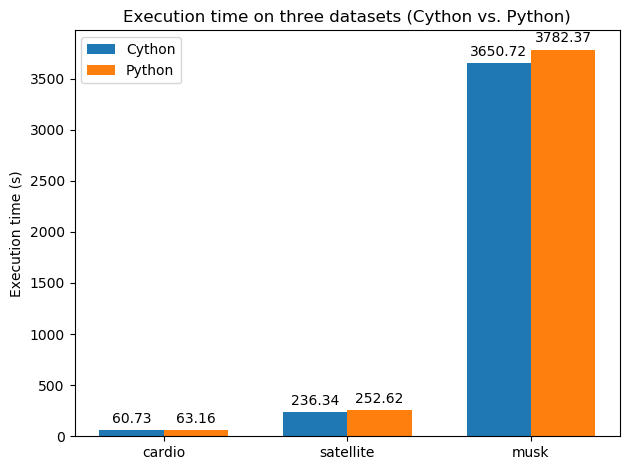

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

labels = ['cardio', 'satellite', 'musk']
cython_means = [60.73, 236.34, 3650.72]
python_means = [63.16, 252.62, 3782.37]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cython_means, width, label='Cython')
rects2 = ax.bar(x + width/2, python_means, width, label='Python')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Execution time (s)')
ax.set_title('Execution time on three datasets (Cython vs. Python)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()



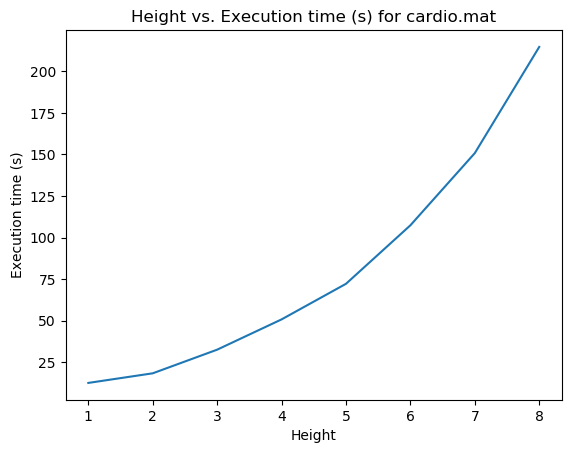

In [23]:
import matplotlib.pyplot as plt
plt.plot(
    [1,2,3,4,5,6,7,8], 
    [12.604439267000998,
    18.38584067800548,
    32.603499371994985,
    50.8089913349977,
    72.21361004699429,
    107.40358673399896,
    150.81484965099662,
    214.67793712099956])
plt.ylabel('Execution time (s)')
plt.xlabel('Height')
plt.title('Height vs. Execution time (s) for cardio.mat')
plt.show()

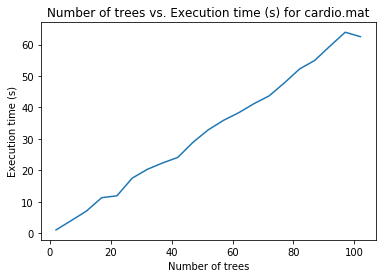

In [5]:
import matplotlib.pyplot as plt
x = np.arange(2, 104, 5)
plt.plot(
    x, 
    [1.0315887589968042,
    4.011168201002874,
    7.0339257739979075,
    11.290350362003664,
    11.880178616003832,
    17.483452641987242,
    20.309223411997664,
    22.3275204590027,
    24.09540602299967,
    28.905385634992854,
    32.861287384002935,
    35.87255313700007,
    38.30312116899586,
    41.178493093000725,
    43.666187577007804,
    47.79091316901031,
    52.21693027300353,
    54.95941942700301,
    59.50023387899273,
    63.913974221999524,
    62.494065648992546])
plt.ylabel('Execution time (s)')
plt.xlabel('Number of trees')
plt.title('Number of trees vs. Execution time (s) for cardio.mat')
plt.show()

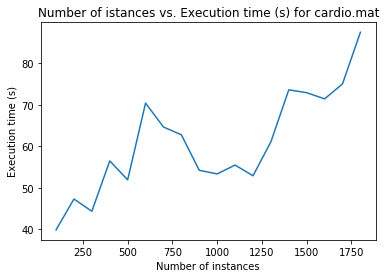

In [10]:
import matplotlib.pyplot as plt
x = np.arange(100, 1900, 100)
plt.plot(
    x, 
    [39.87026540299121,
47.30587146998732,
44.36571619400638,
56.49343574100931,
51.93081428500591,
70.4081487749936,
64.65354633900279,
62.77559132500028,
54.22620759801066,
53.35472618500353,
55.49450583300495,
52.90500375600823,
61.0898498930037,
73.60722430799797,
72.91881909099175,
71.42669066599046,
75.03796172500006,
    87.4771403689956])
plt.ylabel('Execution time (s)')
plt.xlabel('Number of instances')
plt.title('Number of instances vs. Execution time (s) for cardio.mat')
plt.show()